The example is using Bayesian Logit Model.

The Bayesian logit model can be expressed as:

$$
P(Y_i = 1 | X_i, \beta) = \frac{e^{X_i'\beta}}{1 + e^{X_i'\beta}}
$$

where $Y_i$ is the binary outcome, $X_i$ is the vector of predictors for observation $i$, and $\beta$ is the vector of parameters to be estimated.

The prior distribution for $\beta$ is typically chosen to be a multivariate normal distribution:

$$
\beta \sim N(\mu, \Sigma)
$$

where $\mu$ is the mean vector and $\Sigma$ is the covariance matrix.

In [1]:
import numpy as np

In [5]:
def nll(data, params):
    x = data['x']  # x is now a matrix
    y = data['y']
    beta = params['beta']  # beta is now a vector

    # Compute the probabilities P(Y = 1 | X, beta)
    z = np.dot(x, beta)
    prob = 1 / (1 + np.exp(-z))

    # Compute the negative log-likelihood
    nll = -np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))

    return nll

In [6]:
def metropolis_hastings(nll, initial_params, data, num_samples, step_size):
    current_params = initial_params
    current_nll = nll(data, current_params)

    samples = []
    for _ in range(num_samples):
        # Propose new parameters
        proposed_params = {key: np.random.normal(loc=value, scale=step_size)
                           for key, value in current_params.items()}

        # Compute the negative log-likelihood of the proposed parameters
        proposed_nll = nll(data, proposed_params)

        # Compute the acceptance probability
        alpha = np.exp(current_nll - proposed_nll)

        # Accept or reject the proposed parameters
        if np.random.rand() < alpha:
            current_params = proposed_params
            current_nll = proposed_nll

        samples.append(current_params)

    return samples

In [7]:
np.random.seed(0)
x = np.random.randn(100, 2)
beta_true = np.array([1, 2])
y = np.random.binomial(1, 1 / (1 + np.exp(-np.dot(x, beta_true))))

data = {'x': x, 'y': y}

# Set the initial parameters and the step size
initial_params = {'beta': np.zeros(2)}
step_size = 0.1

# Run the Metropolis-Hastings algorithm
samples = metropolis_hastings(nll, initial_params, data, num_samples=1000, step_size=step_size)

# Print the first few samples
for i, sample in enumerate(samples[:10]):
    print(f'Sample {i + 1}: {sample}')

Sample 1: {'beta': array([ 0.04937418, -0.01161039])}
Sample 2: {'beta': array([0.05919285, 0.0789386 ])}
Sample 3: {'beta': array([0.04813878, 0.18095587])}
Sample 4: {'beta': array([0.13109589, 0.16022407])}
Sample 5: {'beta': array([0.02657055, 0.2813386 ])}
Sample 6: {'beta': array([-0.10279287,  0.34904128])}
Sample 7: {'beta': array([0.1275988, 0.2430397])}
Sample 8: {'beta': array([0.18952897, 0.2371771 ])}
Sample 9: {'beta': array([0.14958407, 0.27418269])}
Sample 10: {'beta': array([0.14958407, 0.27418269])}


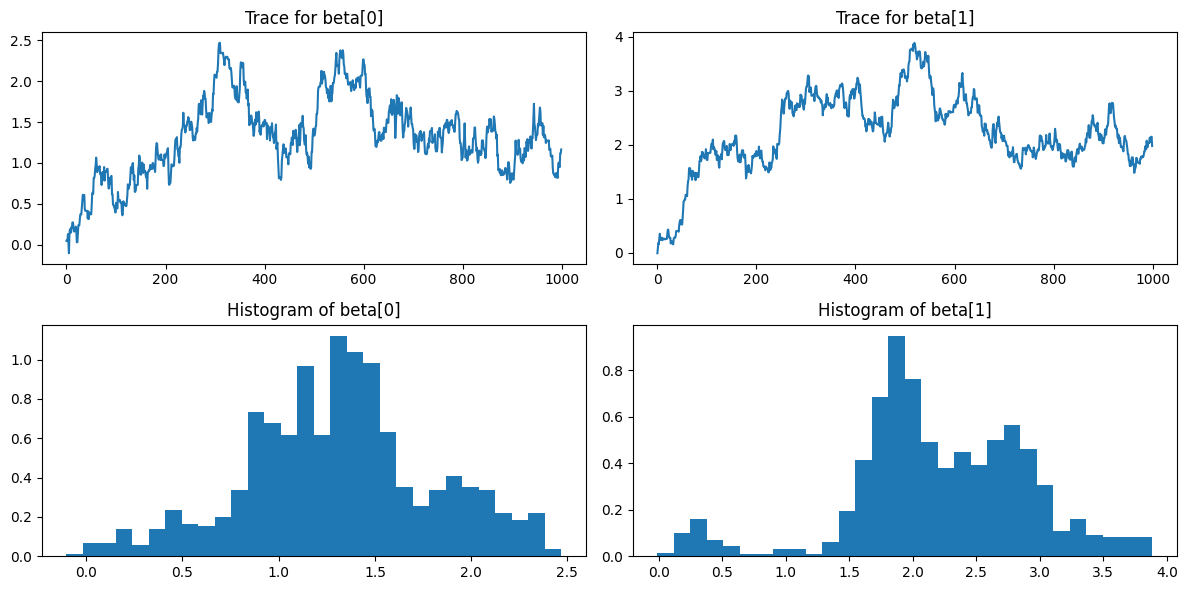

In [8]:
import matplotlib.pyplot as plt

# Extract the beta samples
beta_samples = np.array([sample['beta'] for sample in samples])

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the trace of the beta samples
plt.subplot(2, 2, 1)
plt.plot(beta_samples[:, 0])
plt.title('Trace for beta[0]')

plt.subplot(2, 2, 2)
plt.plot(beta_samples[:, 1])
plt.title('Trace for beta[1]')

# Plot the histogram of the beta samples
plt.subplot(2, 2, 3)
plt.hist(beta_samples[:, 0], bins=30, density=True)
plt.title('Histogram of beta[0]')

plt.subplot(2, 2, 4)
plt.hist(beta_samples[:, 1], bins=30, density=True)
plt.title('Histogram of beta[1]')

# Show the figure
plt.tight_layout()
plt.show()